# **Introduction et Objectifs**

#**Préparation de Base De Données**

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls drive/MyDrive

In [ ]:
!unzip drive/MyDrive/archive.zip

#**Import Data Set**

In [ ]:
import numpy as np

X= np.load("X.npy")
Y= np.load("Y.npy")

In [ ]:
print("Dimensions de X:", X.shape)
print("Dimensions de Y:", Y.shape)

Dimensions de X: (2062, 64, 64)
Dimensions de Y: (2062, 10)


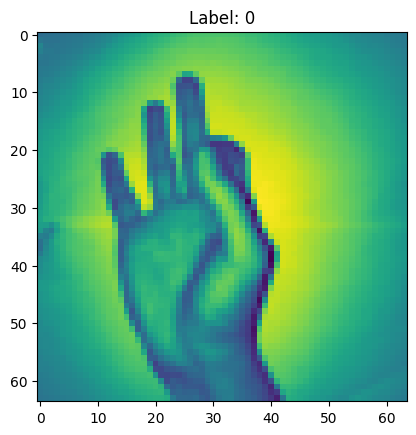

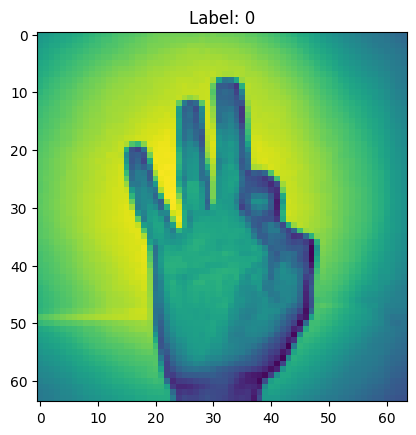

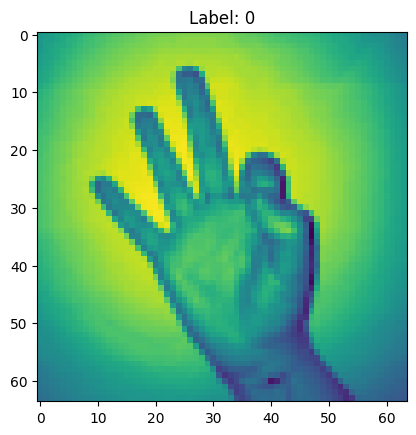

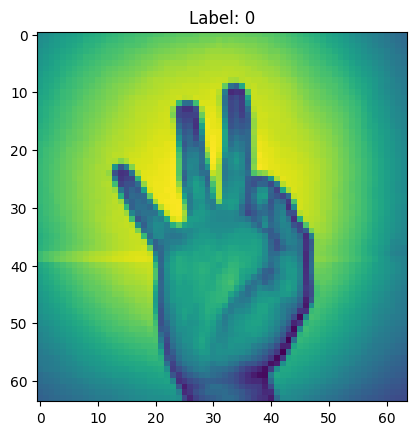

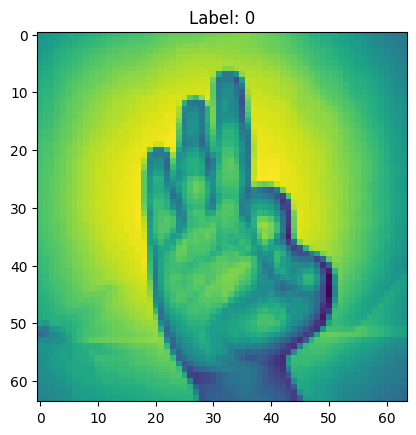

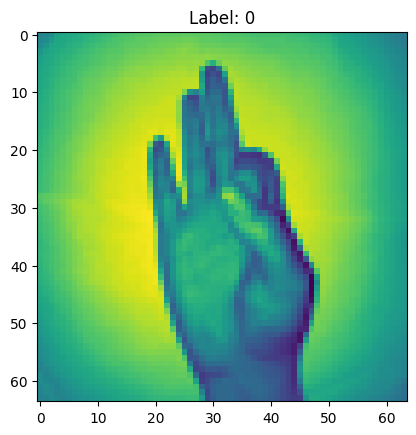

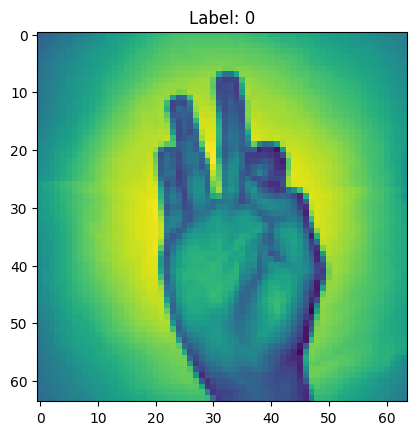

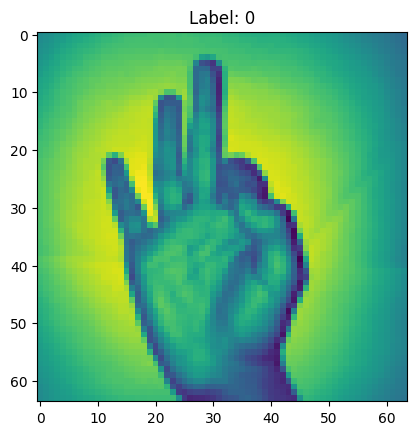

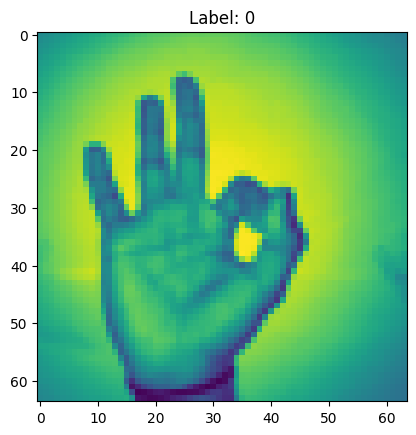

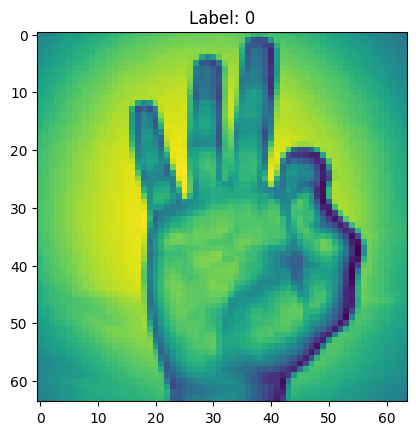

In [ ]:
import matplotlib.pyplot as plt

# Afficher les premières images
for i in range(10):
    plt.imshow(X[i])
    plt.title(f"Label: {np.argmax(Y[i])}")
    plt.show()

In [ ]:
#Préparation des données, normaliser les données pour qu'elles soient dans l'intervalle [0, 1]:
X_normalized = X / 255.0

In [ ]:
#division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)

In [ ]:
!ls drive/MyDrive

 archive.zip		 data.zip		       __pycache__
 articleGeneration.py	 Filtered-Ashley-Madison.txt   shakespeare.txt
 Ashley-Madison.txt	 Letter.gdoc		      'Untitled document (1).gdoc'
'Colab Notebooks'	 my_model		      'Untitled document.gdoc'
 DATABASE_Password.zip	 nameGeneration.py


#**Créationn d'un CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

**Define the CNN model**

In [ ]:
class CNNModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        # Convolutional layers
        self.conv1 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')
        self.conv2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')
        self.conv3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')  # Increased to 128 filters
        self.conv4 = layers.Conv2D(256, (3, 3), padding='same', activation='relu')  # Added new layer with 256 filters
        # Pooling layer
        self.pool = layers.MaxPooling2D((2, 2))
        # Flatten layer
        self.flatten = layers.Flatten()
        # Fully connected layers
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(256, activation='relu')  # Added new layer with 256 units
        self.fc3 = layers.Dense(num_classes)  # Output layer

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)  # Added new convolutional layer
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)  # Added new dense layer
        return self.fc3(x)

In [ ]:
num_classes = 10 # Modify this according to your dataset
model = CNNModel(num_classes)

**Compile the model**


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#**Traning**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load your data
X = np.load("X.npy")
Y = np.load("Y.npy")

# Convert labels from one-hot encoding to integer encoding
Y = np.argmax(Y, axis=1).astype('int32')

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Reshape X_train and X_test for grayscale or color images as needed
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Now, you can fit your model
model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
52/52 [==============================] - 23s 111ms/step - loss: 2.3662 - accuracy: 0.0964 - val_loss: 2.3025 - val_accuracy: 0.0847
Epoch 2/10
52/52 [==============================] - 3s 63ms/step - loss: 1.7528 - accuracy: 0.3839 - val_loss: 0.8013 - val_accuracy: 0.7433
Epoch 3/10
52/52 [==============================] - 3s 63ms/step - loss: 0.6773 - accuracy: 0.7768 - val_loss: 0.5394 - val_accuracy: 0.8111
Epoch 4/10
52/52 [==============================] - 3s 63ms/step - loss: 0.4489 - accuracy: 0.8490 - val_loss: 0.4935 - val_accuracy: 0.8402
Epoch 5/10
52/52 [==============================] - 3s 66ms/step - loss: 0.3197 - accuracy: 0.8902 - val_loss: 0.4975 - val_accuracy: 0.8620
Epoch 6/10
52/52 [==============================] - 3s 61ms/step - loss: 0.2160 - accuracy: 0.9266 - val_loss: 0.5292 - val_accuracy: 0.8426
Epoch 7/10
52/52 [==============================] - 3s 63ms/step - loss: 0.1353 - accuracy: 0.9582 - val_loss: 0.5750 - val_accuracy: 0.8378
Epoch 8/10


**Save & Load the model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model to your drive
model.save('/content/drive/My Drive/my_model')
!ls '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 archive.zip		 data.zip		       __pycache__
 articleGeneration.py	 Filtered-Ashley-Madison.txt   shakespeare.txt
 Ashley-Madison.txt	 Letter.gdoc		      'Untitled document (1).gdoc'
'Colab Notebooks'	 my_model		      'Untitled document.gdoc'
 DATABASE_Password.zip	 nameGeneration.py


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/my_model')

**Training** **Results**

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
52/52 [==============================] - 6s 68ms/step - loss: 0.0974 - accuracy: 0.9703 - val_loss: 0.6061 - val_accuracy: 0.8668
Epoch 2/10
52/52 [==============================] - 3s 62ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.8175 - val_accuracy: 0.8644
Epoch 3/10
52/52 [==============================] - 3s 65ms/step - loss: 0.0236 - accuracy: 0.9933 - val_loss: 0.7980 - val_accuracy: 0.8354
Epoch 4/10
52/52 [==============================] - 3s 63ms/step - loss: 0.0381 - accuracy: 0.9897 - val_loss: 0.6643 - val_accuracy: 0.8717
Epoch 5/10
52/52 [==============================] - 3s 66ms/step - loss: 0.0109 - accuracy: 0.9976 - val_loss: 0.8258 - val_accuracy: 0.8596
Epoch 6/10
52/52 [==============================] - 3s 62ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.6030 - val_accuracy: 0.8765
Epoch 7/10
52/52 [==============================] - 3s 63ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.6233 - val_accuracy: 0.8886
Epoch 8/10
52

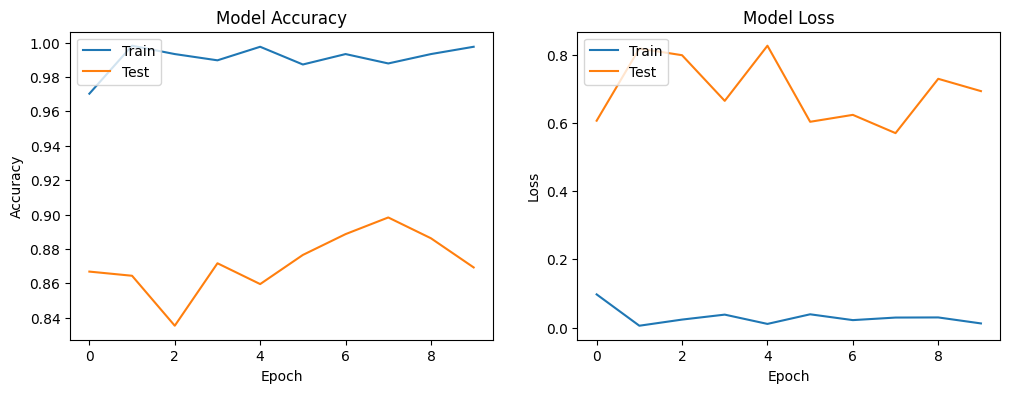

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

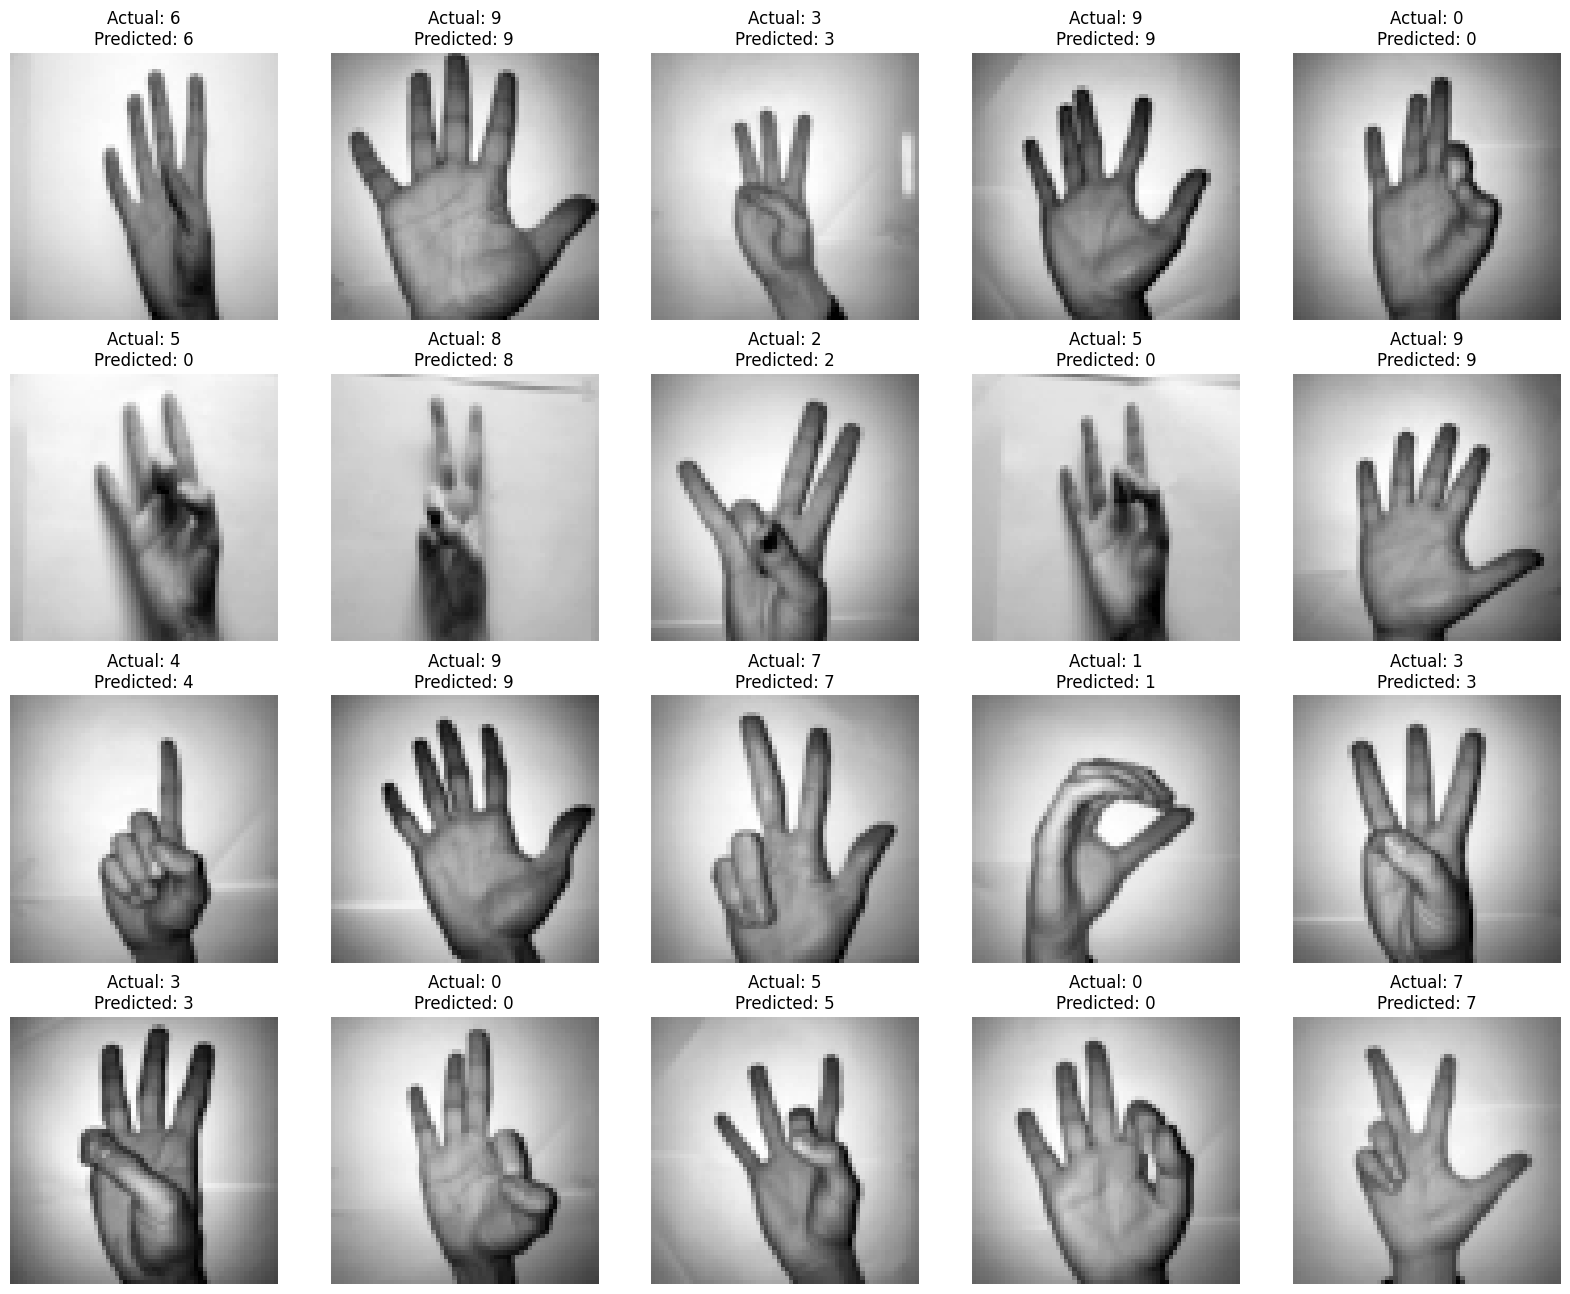

In [ ]:
import matplotlib.pyplot as plt

# Choose the number of images you want to display
num_images_to_display = 20

# Set the number of images in each row
num_images_per_row = 5

# Calculate the number of rows needed
num_rows = num_images_to_display // num_images_per_row

# Set the figure size
plt.figure(figsize=(20, 4 * num_rows))

for i in range(num_images_to_display):
    # Calculate the position of the subplot
    plt.subplot(num_rows, num_images_per_row, i + 1)

    # Display original image
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')  # Adjust the shape and color map according to your dataset
    plt.title(f"Actual: {Y_test[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')

plt.show()
